# Creating Functions
At this point, we’ve written code to draw some interesting features in our inflammation data, loop over all our data files to quickly draw these plots for each of them, and have Python make decisions based on what it sees in our data. But, our code is getting pretty long and complicated; what if we had thousands of datasets, and didn’t want to generate a figure for every single one? Commenting out the figure-drawing code is a nuisance. Also, what if we want to use that code again, on a different dataset or at a different point in our program? Cutting and pasting it is going to make our code get very long and very repetitive, very quickly. We’d like a way to package our code so that it is easier to reuse, and Python provides for this by letting us define things called ‘functions’ — a shorthand way of re-executing longer pieces of code. Let’s start by defining a function `fahr_to_celsius` that converts temperatures from Fahrenheit to Celsius

In [1]:
def explicit_fahr_to_celsius(temp):
    # Assign the converted value to a variable
    converted = ((temp - 32) * (5/9))
    # Return the value of the new variable
    return converted
    
def fahr_to_celsius(temp):
    # Return converted value more efficiently using the return
    # function without creating a new variable. This code does
    # the same thing as the previous function but it is more explicit
    # in explaining how the return command works.
    return ((temp - 32) * (5/9))


The function definition opens with the keyword `def` followed by the name of the function `(fahr_to_celsius)` and a parenthesized list of parameter names `(temp)`. The body of the function — the statements that are executed when it runs — is indented below the definition line. The body concludes with a return keyword followed by the `return` value.

When we call the function, the values we pass to it are assigned to those variables so that we can use them inside the function. Inside the function, we use a return statement to send a result back to whoever asked for it.

Let’s try running our function

In [2]:
T1 = fahr_to_celsius(32)
T2 = explicit_fahr_to_celsius(451)
print('T1 = ',T1)
print('T2 = ',T2)
print('Fusion point of water is ',fahr_to_celsius(32.0),'°C')
print('Paper burns at',fahr_to_celsius(451.0),'°C')

T1 =  0.0
T2 =  232.7777777777778
Fusion point of water is  0.0 °C
Paper burns at 232.7777777777778 °C


In [3]:
fahr_to_celsius?

One might forget what a function does, so we can ask with `?` after the name of the function.

# Composing Funcitons

Composing Functions

Now that we’ve seen how to turn Fahrenheit into Celsius, we can also write the function to turn Celsius into Kelvin:

In [4]:
def celsius_to_kelvin(temp_c):
    return temp_c + 273.15

print('freezing point of water in Kelvin:', celsius_to_kelvin(0.))


freezing point of water in Kelvin: 273.15


What about converting Fahrenheit to Kelvin? We could write out the formula, but we don’t need to. Instead, we can compose the two functions we have already created:



In [5]:
def fahr_to_kelvin(temp_f):
    temp_c = fahr_to_celsius(temp_f)
    temp_k = celsius_to_kelvin(temp_c)
    return temp_k

print('boiling point of water in Kelvin:', fahr_to_kelvin(212.0))



boiling point of water in Kelvin: 373.15


This is our first taste of how larger programs are built: we define basic operations, then combine them in ever-larger chunks to get the effect we want. Real-life functions will usually be larger than the ones shown here — typically half a dozen to a few dozen lines — but they shouldn’t ever be much longer than that, or the next person who reads it won’t be able to understand what’s going on.

# Variable Scope

In composing our temperature conversion functions, we created variables inside of those functions, `temp`, `temp_c`, `temp_f`, and `temp_k`. We refer to these variables as local variables because they no longer exist once the function is done executing. If we try to access their values outside of the function, we will encounter an error:



In [6]:
print('Again, temperature in Kelvin was:', temp_k)


NameError: name 'temp_k' is not defined

If you want to reuse the temperature in Kelvin after you have calculated it with `fahr_to_kelvin`, you can store the result of the function call in a variable

In [8]:
temp_kelvin = fahr_to_kelvin(212.0)
print('temperature in Kelvin was:', temp_kelvin)

temperature in Kelvin was: 373.15


The variable `temp_kelvin`, being defined outside any function, is said to be global.

Inside a function, one can read the value of such global variables:

In [9]:
def print_temperatures():
  print('temperature in Fahrenheit was:', temp_fahr)
  print('temperature in Kelvin was:', temp_kelvin)

temp_fahr = 212.0
temp_kelvin = fahr_to_kelvin(temp_fahr)

print_temperatures()


temperature in Fahrenheit was: 212.0
temperature in Kelvin was: 373.15


# Tidying up
Now that we know how to wrap bits of code up in functions, we can make our inflammation analysis easier to read and easier to reuse. First, let’s make a `visualize` function that generates our plots and another function called `detect_problems` that checks for those systematics we noticed:



In [10]:
def visualize(filename):

    data = np.loadtxt(fname=filename, delimiter=',')

    fig = plt.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(np.max(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(np.min(data, axis=0))

    fig.tight_layout()
    plt.show()
    
    
def detect_problems(filename):

    data = np.loadtxt(fname=filename, delimiter=',')

    if np.max(data, axis=0)[0] == 0 and np.max(data, axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif np.sum(np.min(data, axis=0)) == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')



Wait! Didn’t we forget to specify what both of these functions should return? Well, we didn’t. In Python, functions are not required to include a `return` statement and can be used for the sole purpose of grouping together pieces of code that conceptually do one thing. In such cases, function names usually describe what they do, e.g. `visualize`, `detect_problems`.

Notice that rather than jumbling this code together in one giant for loop, we can now read and reuse both ideas separately. We can reproduce the previous analysis with a much simpler `for` loop:

In [11]:
import numpy as np
import glob
import matplotlib.pyplot as plt


data/inflammation-06.csv


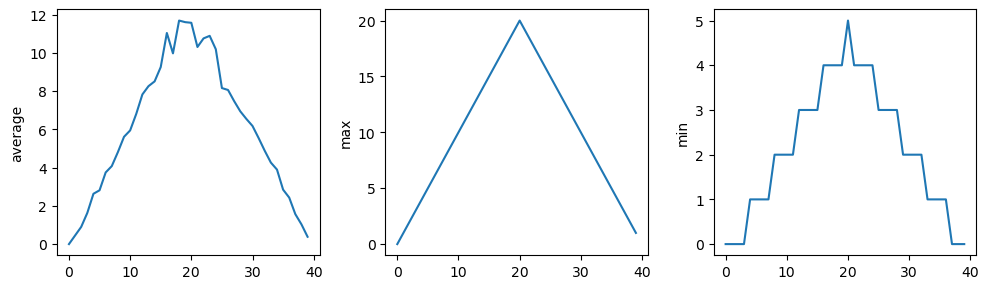

Suspicious looking maxima!
data/inflammation-07.csv


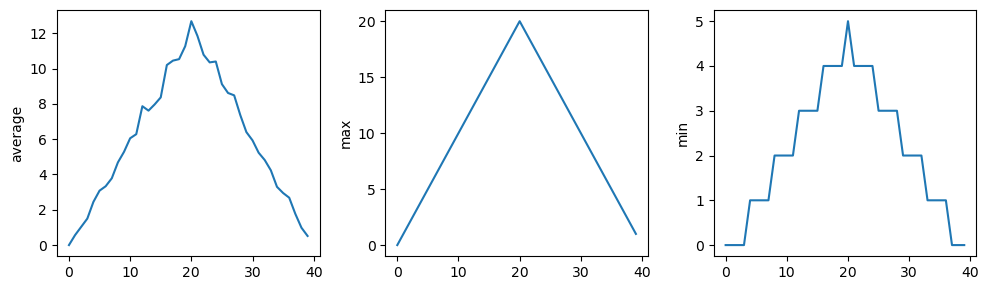

Suspicious looking maxima!
data/inflammation-08.csv


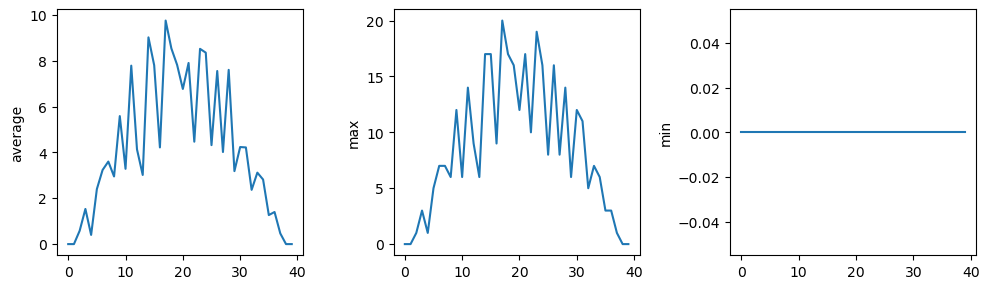

Minima add up to zero!
data/inflammation-09.csv


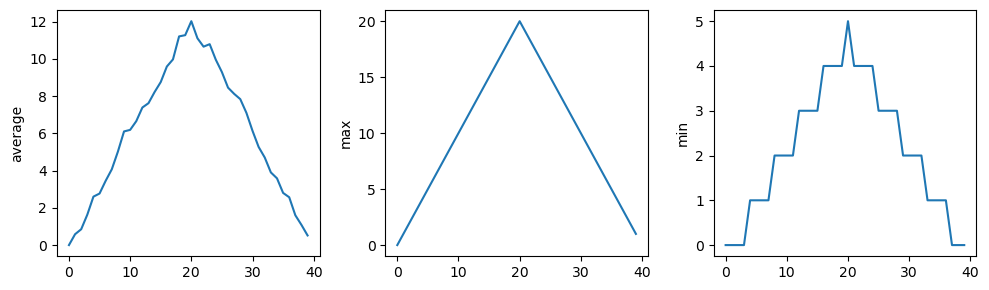

Suspicious looking maxima!
data/inflammation-10.csv


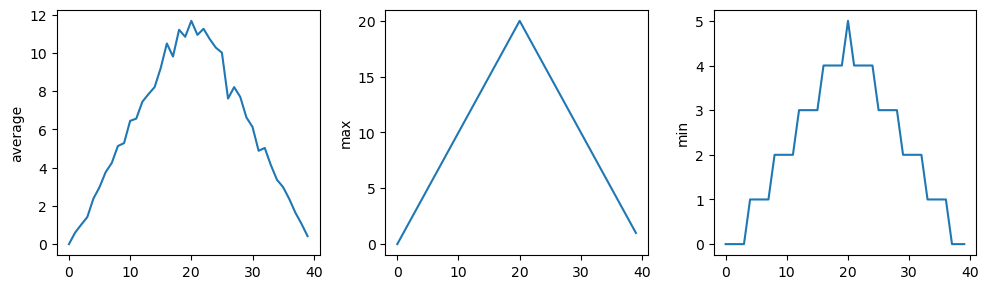

Suspicious looking maxima!


In [13]:
filenames = sorted(glob.glob('data/inflammation*.csv'))

for filename in filenames[5:10]:
    print(filename)
    visualize(filename)
    detect_problems(filename)


# Testing and Documenting
Once we start putting things in functions so that we can re-use them, we need to start testing that those functions are working correctly. To see how to do this, let’s write a function to offset a dataset so that it’s mean value shifts to a user-defined value:

In [14]:
def offset_mean(data, target_mean_value):
    return (data - np.mean(data)) + target_mean_value



We could test this on our actual data, but since we don’t know what the values ought to be, it will be hard to tell if the result was correct. Instead, let’s use NumPy to create a matrix of 0’s and then offset its values to have a mean value of 3:

In [15]:
z = np.zeros((2,2))
print(z)
target_mean = 3
print('Right way of calling this function is with the arguments in the order z and target_mean',
      offset_mean(z, target_mean))
print('Wrong way of calling this function is with the arguments in the order target_mean and z',
      offset_mean(target_mean,z))

[[0. 0.]
 [0. 0.]]
Right way of calling this function is with the arguments in the order z and target_mean [[3. 3.]
 [3. 3.]]
Wrong way of calling this function is with the arguments in the order target_mean and z [[0. 0.]
 [0. 0.]]


That looks right, so let’s try `offset_mean` on our real data:

In [16]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print(offset_mean(data, 0))


[[-6.14875 -6.14875 -5.14875 ... -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ... -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ... -4.14875 -5.14875 -5.14875]
 ...
 [-6.14875 -5.14875 -5.14875 ... -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ... -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ... -5.14875 -5.14875 -6.14875]]


It’s hard to tell from the default output whether the result is correct, but there are a few tests that we can run to reassure us:



In [17]:
print('original min, mean, and max are:', np.min(data), np.mean(data), np.max(data))
offset_data = offset_mean(data, 0)
print('min, mean, and max of offset data are:',
      np.min(offset_data),
      np.mean(offset_data),
      np.max(offset_data))


original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and max of offset data are: -6.14875 2.842170943040401e-16 13.85125


That seems almost right: the original mean was about 6.1, so the lower bound from zero is now about -6.1. The mean of the offset data isn’t quite zero — we’ll explore why not in the challenges — but it’s pretty close. We can even go further and check that the standard deviation hasn’t changed:



In [18]:
print('std dev before and after:', np.std(data), np.std(offset_data))


std dev before and after: 4.613833197118566 4.613833197118566


Those values look the same, but we probably wouldn’t notice if they were different in the sixth decimal place. Let’s do this instead:

In [19]:
print('difference in standard deviations before and after:',
      np.std(data) - np.std(offset_data))


difference in standard deviations before and after: 0.0


Again, the difference is very small. It’s still possible that our function is wrong, but it seems unlikely enough that we should probably get back to doing our analysis. We have one more task first, though: we should write some documentation for our function to remind ourselves later what it’s for and how to use it.

The usual way to put documentation in software is to add comments like this:

In [20]:
# offset_mean(data, target_mean_value):
# return a new array containing the original data with its mean offset to match the desired value.
def offset_mean0(data, target_mean_value):
    return (data - np.mean(data)) + target_mean_value

def offset_mean1(data:np.ndarray, target_mean_value:float)->np.ndarray:
    """
    data: type numpy array
    target_mean_value type: float
    Description: takes an array, substract its mean sums a new offset
    Return
    type:numpy array
    

    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])
    """
    return (data - np.mean(data)) + target_mean_value

# help(offset_mean)


With the second option we can see the documentation for the function via `help`command or asking nicely with `?`

In [22]:
help(offset_mean1)
# offset_mean1?

Help on function offset_mean1 in module __main__:

offset_mean1(data: numpy.ndarray, target_mean_value: float) -> numpy.ndarray
    data: type numpy array
    target_mean_value type: float
    Description: takes an array, substract its mean sums a new offset
    Return
    type:numpy array
    
    
    Examples
    --------
    >>> offset_mean([1, 2, 3], 0)
    array([-1.,  0.,  1.])



# Defining Defaults
We have passed parameters to functions in two ways: directly, as in `type(data)`, and by name, as in `np.loadtxt(fname='something.csv', delimiter=',')`. In fact, we can pass the filename to `loadtxt` without the `fname=`:

In [ ]:
np.loadtxt('data/inflammation-01.csv', delimiter=',')



but we still need to say `delimiter=`:

In [ ]:
np.loadtxt('data/inflammation-01.csv', ',')


To understand what’s going on, and make our own functions easier to use, let’s re-define our `offset_mean` function like this:

In [ ]:
def offset_mean(data:np.ndarray, target_mean_value:float=0.0)->np.ndarray:
    """Return a new array containing the original data
       with its mean offset to match the desired value, (0 by default).

    Examples
    --------
    >>> offset_mean([1, 2, 3])
    array([-1.,  0.,  1.])
    """
    return (data - np.mean(data)) + target_mean_value


The key change is that the second parameter is now written `target_mean_value=0.0` instead of just target_mean_value. If we call the function with two arguments, it works as it did before:

In [ ]:
test_data = np.zeros((2, 2))
print(offset_mean(test_data,3))

But we can also now call it with just one parameter, in which case `target_mean_value` is automatically assigned the default value of 0.0:

In [ ]:
more_data = 5 + np.zeros((2, 2))
print('data before mean offset:')
print(more_data)
print('offset data:')
print(offset_mean(more_data))


This is handy: if we usually want a function to work one way, but occasionally need it to do something else, we can allow people to pass a parameter when they need to but provide a default to make the normal case easier. The example below shows how Python matches values to parameters:

In [ ]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)


As this example shows, parameters are matched up from left to right, and any that haven’t been given a value explicitly get their default value. We can override this behavior by naming the value as we pass it in:



In [ ]:
print('only setting the value of c')
display(c=77)


With that in hand, let’s look at the help for `np.loadtxt`:

In [ ]:
help(np.loadtxt)

There’s a lot of information here, but the most important part is the first couple of lines:

`loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, use
cols=None, unpack=False, ndmin=0, encoding='bytes')`

This tells us that `loadtxt` has one parameter called `fname` that doesn’t have a default value, and eight others that do. If we call the function like this:

`np.loadtxt('inflammation-01.csv', ',')`


then the filename is assigned to `fname` (which is what we want), but the delimiter string `','` is assigned to `dtype` rather than `delimiter`, because `dtype` is the second parameter in the list. However `','` isn’t a known `dtype` so our code produced an error message when we tried to run it. When we call `loadtxt` we don’t have to provide `fname=` for the filename because it’s the first item in the list, but if we want the `','` to be assigned to the variable `delimiter`, we do have to provide `delimiter=` for the second parameter since `delimiter` is not the second parameter in the list.

# Readable functions

Consider these two functions:

In [ ]:
def s(p):
    a = 0
    for v in p:
        a += v
    m = a / len(p)
    d = 0
    for v in p:
        d += (v - m) * (v - m)
    return numpy.sqrt(d / (len(p) - 1))

def std_dev(sample):
    sample_sum = 0
    for value in sample:
        sample_sum += value

    sample_mean = sample_sum / len(sample)

    sum_squared_devs = 0
    for value in sample:
        sum_squared_devs += (value - sample_mean) * (value - sample_mean)

    return numpy.sqrt(sum_squared_devs / (len(sample) - 1))


The functions `s` and `std_dev` are computationally equivalent (they both calculate the sample standard deviation), but to a human reader, they look very different. You probably found `std_dev` much easier to read and understand than `s`.

As this example illustrates, both documentation and a programmer’s coding style combine to determine how easy it is for others to read and understand the programmer’s code. Choosing meaningful variable names and using blank spaces to break the code into logical “chunks” are helpful techniques for producing readable code. This is useful not only for sharing code with others, but also for the original programmer. If you need to revisit code that you wrote months ago and haven’t thought about since then, you will appreciate the value of readable code!